In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
stop_words = nltk.corpus.stopwords.words('english')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv('../data/Exam_NLP.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
# fill missing values for overview and tagline
df['overview'] = df['overview'].fillna('')
df['tagline'] = df['tagline'].fillna('')

df['description'] = df['overview'] + df['tagline']
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,description
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"John Carter is a war-weary, former military ca..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
# function to tokenize text
def token_pro(text):
    if pd.notna(text):  # Check if the text is not NaN
        tokens = word_tokenize(text) # Tokenize the text
        tokens = [word.lower() for word in tokens]  # Convert to lowercase
        tokens = [word.strip() for word in tokens]  # Remove whitespaces
        tokens = [word for word in tokens if word.isalnum()]  # Filter out non-alphanumeric words
        tokens = [word for word in tokens if not word in stop_words]  # Remove stopwords
        return tokens
    else:
        return []  # Return an empty list for NaN values

In [7]:
# Example usage to process the 'description' column
df['description'] = df['description'].apply(token_pro)

In [8]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,description
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[22nd, century, paraplegic, marine, dispatched..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[captain, barbossa, long, believed, dead, come..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[cryptic, message, bond, past, sends, trail, u..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[following, death, district, attorney, harvey,..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[john, carter, former, military, captain, inex..."


In [9]:
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['description'].apply(lambda x: ' '.join(x)))
bow = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())
bow

,00,000,007,10,100,1000,1001,10th,11,117,...,zorro,zuckerberg,zula,zuzu,zwei,zyklon,æon,éloigne,émigré,única
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
tfidf_vectorizer = CountVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['description'].apply(lambda x: ' '.join(x)))
tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf

,00,000,007,10,100,1000,1001,10th,11,117,...,zorro,zuckerberg,zula,zuzu,zwei,zyklon,æon,éloigne,émigré,única
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from time import time
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [12]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import numpy as np

def best_num_topics_ldia(vec):
    # Create a list to store perplexity scores for different numbers of topics
    perplexity_scores = []

    # Define a range of candidate topic numbers
    num_topics_range = [5, 10, 15, 20, 25]

    for num_topics in num_topics_range:
        lda = LatentDirichletAllocation(
            n_components=num_topics,
            learning_method="online",
            learning_offset=50.0,
            random_state=0,
        )
        
        lda.fit(vec)
        perplexity = lda.perplexity(vec)
        perplexity_scores.append(perplexity)

    # Find the number of topics with the lowest perplexity
    best_num_topics = num_topics_range[np.argmin(perplexity_scores)]
    best_perplexity = min(perplexity_scores)

    print(f"Best Number of Topics: {best_num_topics}")
    print(f"Best Perplexity Score: {best_perplexity:.2f}")

    return best_num_topics


Best Number of Topics: 5
Best Perplexity Score: 7620.67


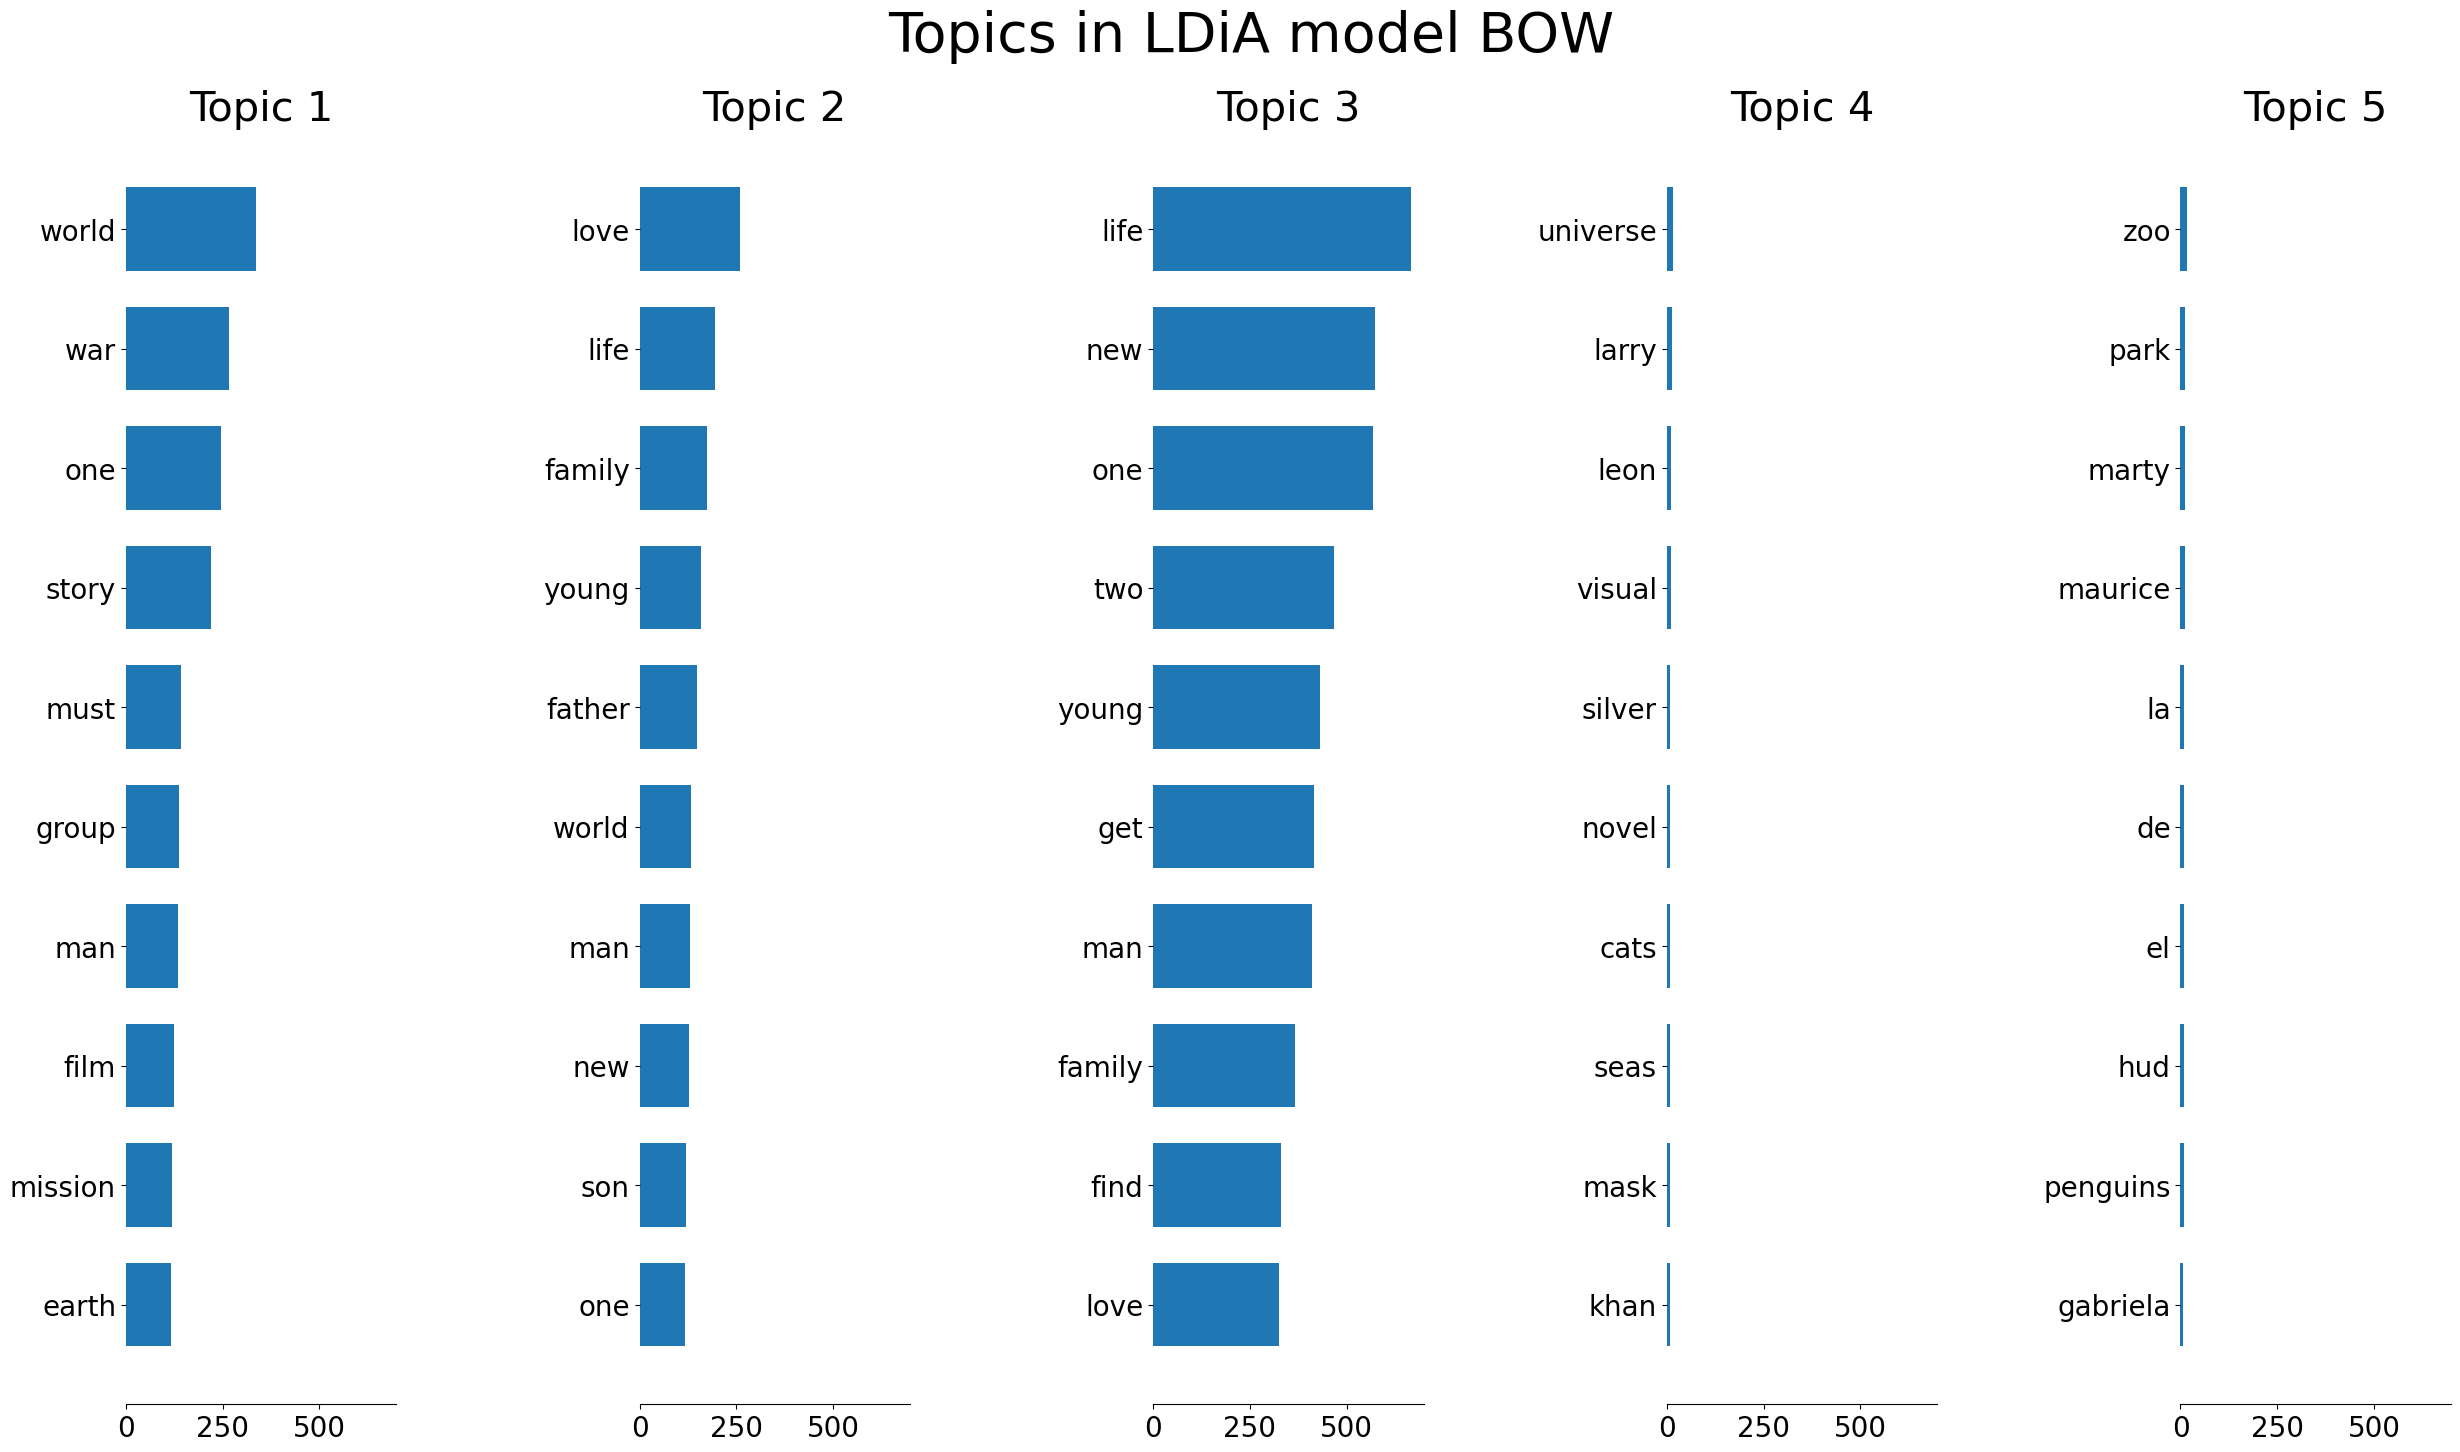

In [13]:
bow_n_topics = best_num_topics_ldia(bow)

bow_lda = LatentDirichletAllocation(
    n_components=bow_n_topics,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
bow_lda.fit(bow)

bow_feature_names = bow_vectorizer.get_feature_names_out()
plot_top_words(bow_lda, bow_feature_names, 10, "Topics in LDiA model BOW")

Best Number of Topics: 5
Best Perplexity Score: 7620.67
number topics: 5


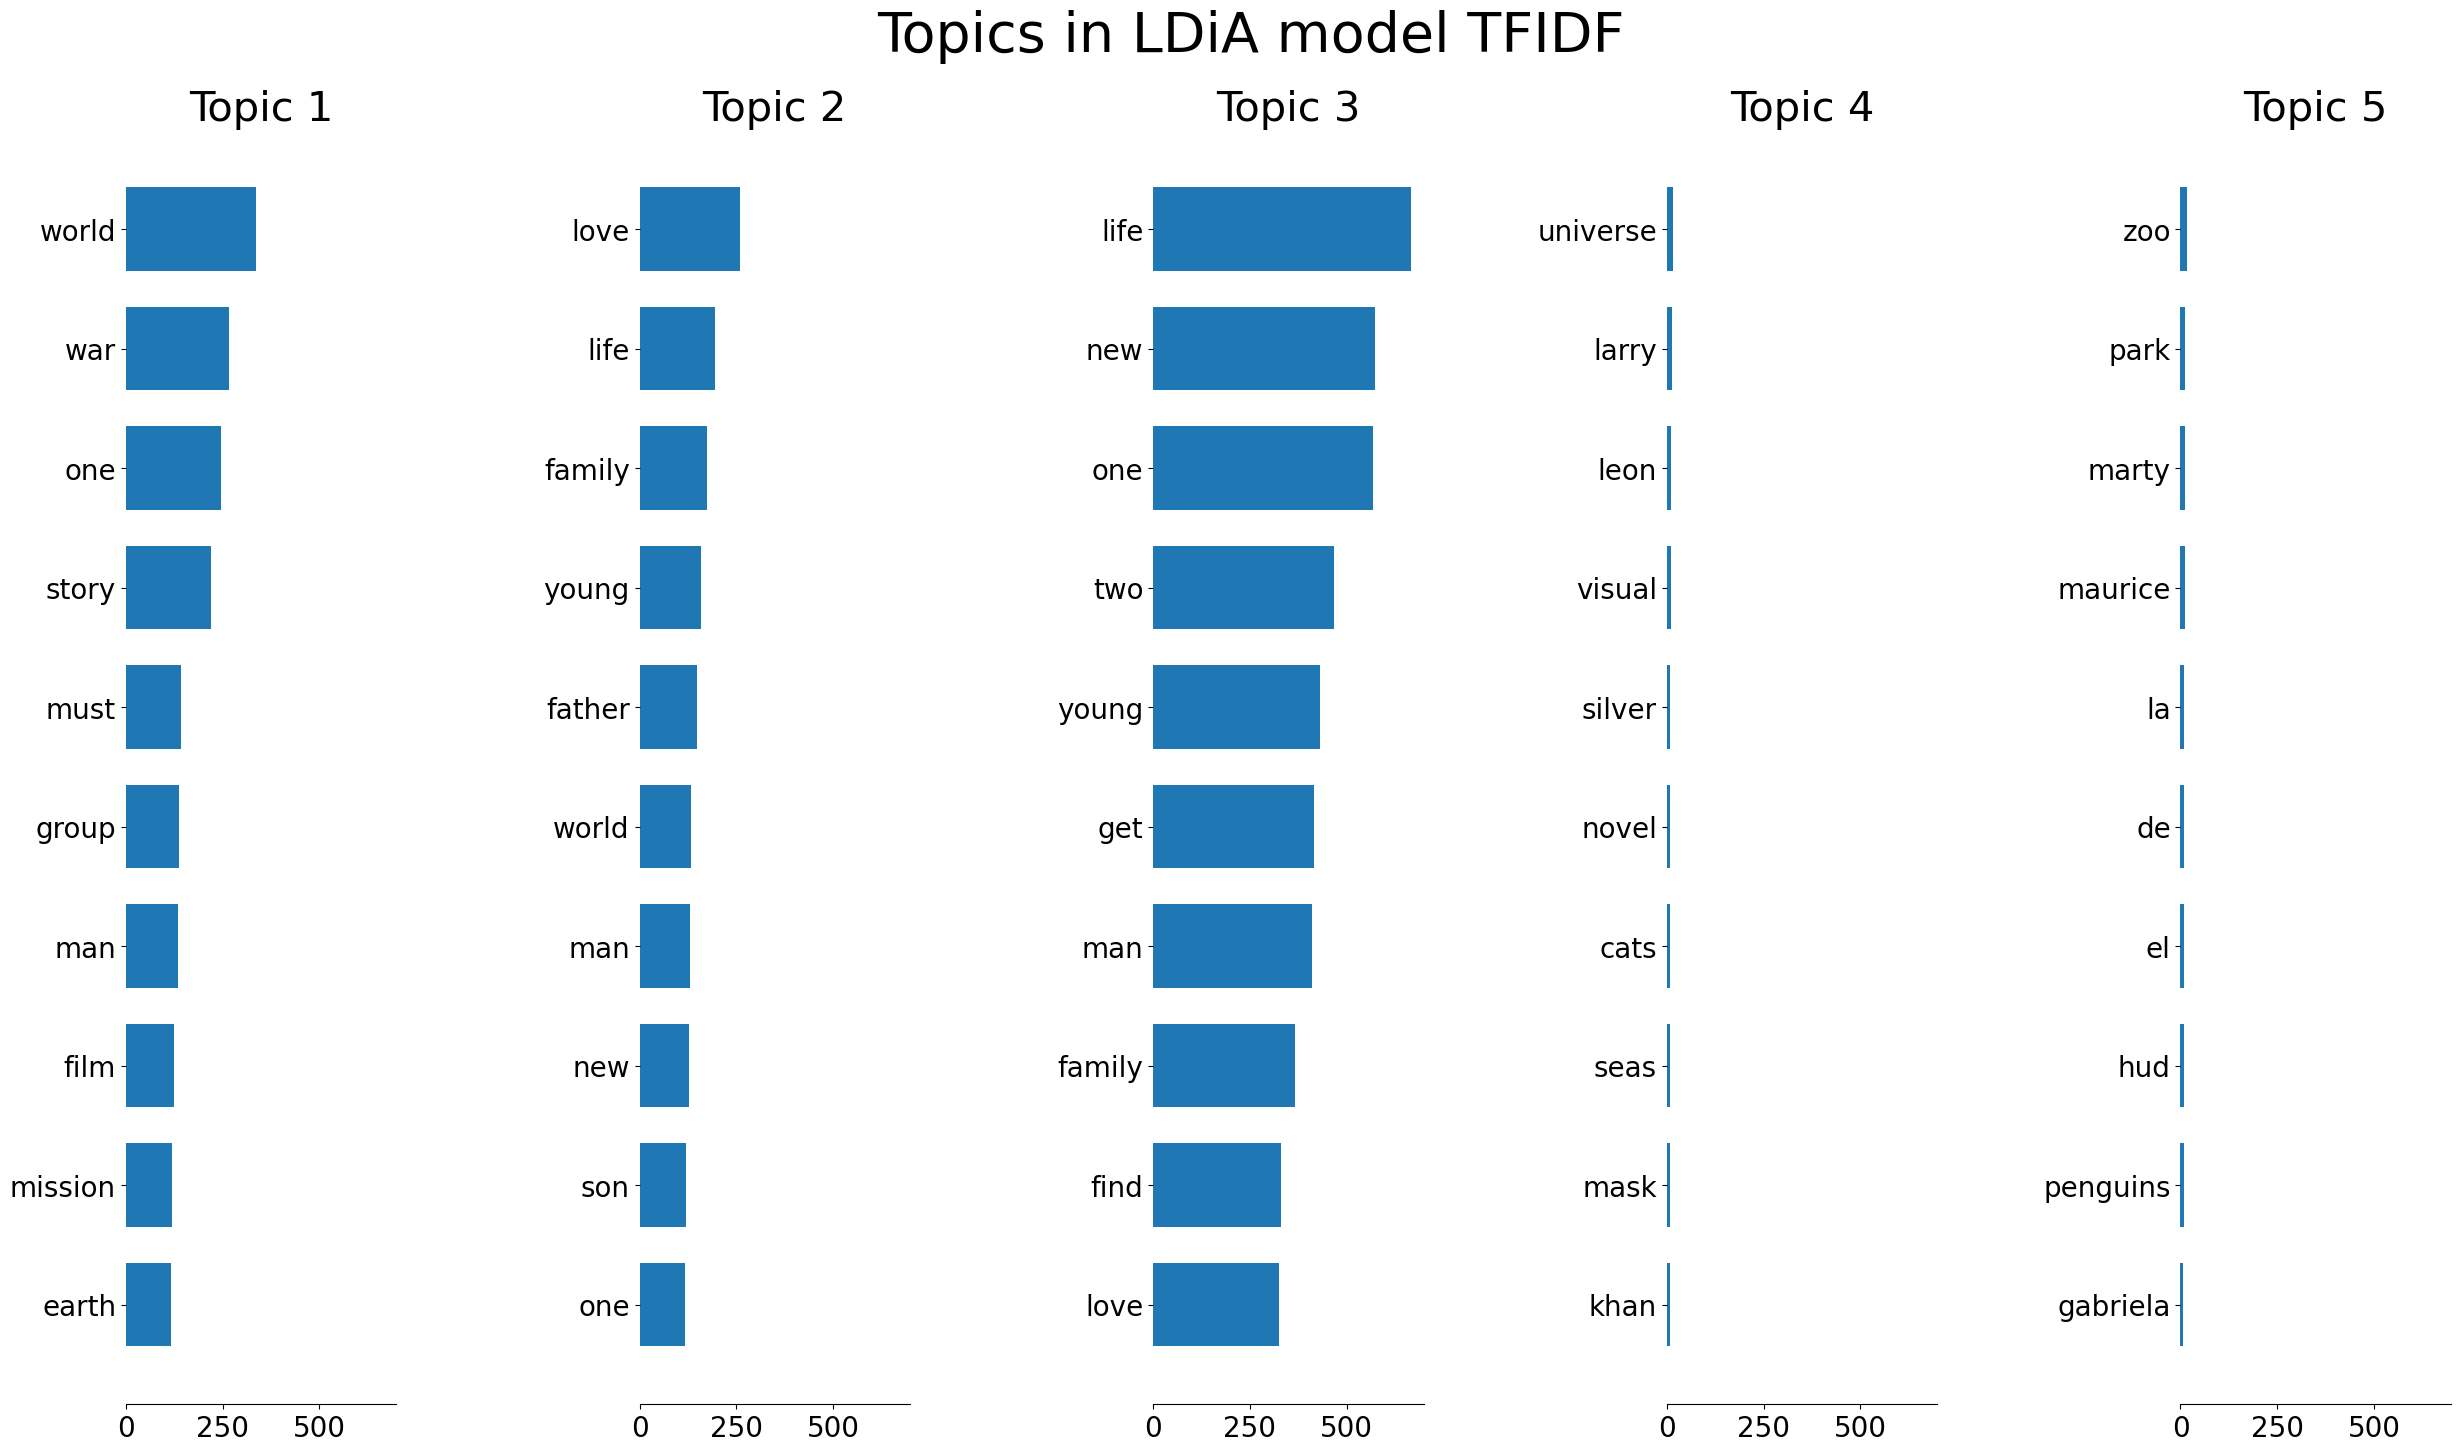

In [14]:
tfidf_n_topics = best_num_topics_ldia(tfidf)
print("number topics: " + str(tfidf_n_topics))

tfidf_lda = LatentDirichletAllocation(
    n_components=tfidf_n_topics,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
tfidf_lda.fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(tfidf_lda, tfidf_feature_names, 10, "Topics in LDiA model TFIDF")

In [15]:
from gensim.models import Word2Vec

# Train a Word2Vec model
#training parameters
num_features = 300
min_word_count = 3
num_workers = 2
window_size = 6
subsampling = 1e-3
# model = Word2Vec(token_list)

model = Word2Vec(sentences=df['description'], vector_size=100, window=5, min_count=1, workers=4)
# model = Word2Vec(token_list)
model.init_sims()

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_11723/1778946869.py:14: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims()


In [16]:
list(model.wv.index_to_key)

['one',
 'life',
 'new',
 'world',
 'man',
 'young',
 'story',
 'two',
 'love',
 'family',
 'find',
 'must',
 'get',
 'time',
 'back',
 'years',
 'father',
 'friends',
 'finds',
 'way',
 'film',
 'help',
 'woman',
 'lives',
 'war',
 'town',
 'home',
 'school',
 'take',
 'city',
 'becomes',
 'first',
 'make',
 'three',
 'son',
 'become',
 'never',
 'girl',
 'friend',
 'save',
 'true',
 'takes',
 'mother',
 'best',
 'set',
 'people',
 'group',
 'wife',
 'go',
 'together',
 'team',
 'soon',
 'day',
 'gets',
 'begins',
 'old',
 'york',
 'comes',
 'death',
 'secret',
 'american',
 'daughter',
 'former',
 'men',
 'high',
 'come',
 'evil',
 'last',
 'boy',
 'named',
 'mysterious',
 'discovers',
 'like',
 'little',
 'night',
 'small',
 'police',
 'earth',
 'movie',
 'work',
 'real',
 'battle',
 'mission',
 'everything',
 'meets',
 'wants',
 'stop',
 'house',
 'year',
 'agent',
 'journey',
 'job',
 'even',
 'big',
 'fight',
 'end',
 'goes',
 'past',
 'murder',
 'good',
 'could',
 'living',
 'ev

In [17]:
model.wv.most_similar('ocean')

[('revenge', 0.9990720748901367),
 ('journey', 0.9990711808204651),
 ('two', 0.999062716960907),
 ('stop', 0.9990619421005249),
 ('put', 0.9990615248680115),
 ('four', 0.9990605711936951),
 ('away', 0.999054491519928),
 ('forces', 0.99904865026474),
 ('leader', 0.9990425109863281),
 ('learns', 0.9990386962890625)]

In [18]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=17, n_iter=7, random_state=42)
print(tfidf.shape)
svd_topic_vectors = svd.fit_transform(tfidf)
svd_topic_vectors = pd.DataFrame(svd_topic_vectors)
svd_topic_vectors.round(3).head(16)


(4803, 21004)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.359,-0.318,-0.342,-0.438,0.625,0.009,-0.308,0.112,-0.137,0.146,0.124,0.000,-0.149,-0.022,-0.012,0.065,0.088
1,0.915,0.473,-0.255,-0.321,0.856,0.166,-0.632,-0.017,-0.098,0.157,-0.063,0.003,-0.074,0.384,0.076,-0.097,0.080
2,0.740,-0.494,0.671,0.136,0.073,0.253,-0.211,-0.033,-0.098,0.040,-0.246,-0.190,0.210,0.467,-0.119,-0.078,-0.004
3,0.819,-0.304,-0.782,0.825,0.200,0.258,0.437,-0.035,0.141,-0.026,-0.046,-0.378,0.258,0.098,-0.501,0.087,0.198
4,0.819,-0.657,-0.659,-0.858,1.241,-0.027,-0.659,0.200,-0.271,0.265,0.244,0.031,-0.259,-0.007,-0.043,0.178,0.173
5,0.453,0.087,-0.016,-0.133,-0.104,-0.395,0.330,-0.217,-0.528,0.302,-0.170,0.122,0.052,0.015,-0.215,-0.069,0.013
6,0.678,-0.145,-0.484,0.644,0.195,0.024,0.310,-0.017,0.051,0.007,-0.033,-0.152,0.085,0.110,-0.197,0.163,0.165
7,0.829,-0.259,-0.558,0.619,0.326,0.163,0.104,-0.156,-0.012,0.075,-0.272,-0.241,0.226,-0.142,0.043,-0.056,0.007
8,0.354,0.014,-0.095,0.018,-0.108,-0.085,-0.132,-0.022,-0.096,-0.208,-0.107,0.002,-0.063,-0.017,-0.142,0.142,-0.073
9,1.214,-0.938,-0.098,0.249,1.062,0.330,0.247,0.650,-0.339,0.134,0.142,-0.156,0.059,0.045,-0.139,0.130,0.068


In [19]:
def truncated_svd_elbow(n_components, words_cooc_matrix, print_elbow = True):
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
    svd.fit(words_cooc_matrix)  
    #print(svd.explained_variance_ratio_) 
    
    if(print_elbow):
        plt.plot(np.arange(0,n_components), svd.explained_variance_ratio_)    
        #for xy in zip(np.arange(0,top_n-1), np.round(svd.explained_variance_ratio_,3)):    
        #    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')    
        plt.xlabel('n_components')
        plt.ylabel('explained_variance_ratio_')
        title = "elbow for truncated svd with n_components " + str(n_components)
        plt.title(title)
        plt.show()
    
    U = svd.transform(words_cooc_matrix)  
    Sigma = svd.singular_values_
    VT = svd.components_
    return U,Sigma,VT

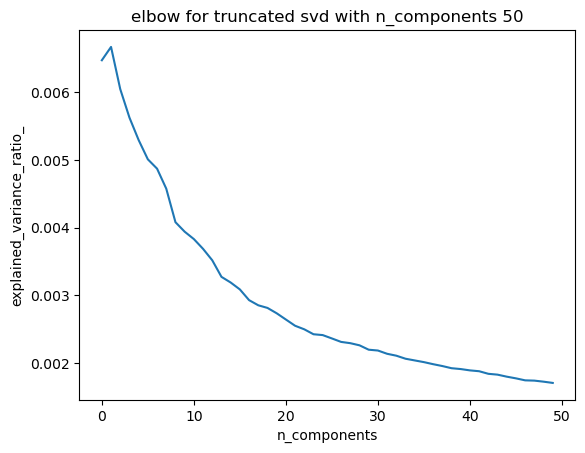

In [20]:
# get the elbow for truncated SVD
U,Sigma,VT = truncated_svd_elbow(50, tfidf, print_elbow = True)

In [21]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,description
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[22nd, century, paraplegic, marine, dispatched..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[captain, barbossa, long, believed, dead, come..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[cryptic, message, bond, past, sends, trail, u..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[following, death, district, attorney, harvey,..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[john, carter, former, military, captain, inex..."


In [22]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity_tfidf = pd.DataFrame(cosine_similarity(tfidf, dense_output=True), columns=df['title'], index=df['title'])
similarity_tfidf.head()

title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
title,,,,,,,,,,,,,,,,,,,,,
Avatar,1.000000,0.051299,0.000000,0.030387,0.113147,0.045883,0.000000,0.035829,0.000000,0.036736,...,0.048912,0.0,0.028028,0.039936,0.000000,0.000000,0.0,0.034199,0.000000,0.000000
Pirates of the Caribbean: At World's End,0.051299,1.000000,0.040825,0.000000,0.110282,0.000000,0.032275,0.069843,0.102598,0.035806,...,0.047673,0.0,0.027318,0.000000,0.000000,0.029111,0.0,0.066667,0.031311,0.000000
Spectre,0.000000,0.040825,1.000000,0.000000,0.000000,0.000000,0.000000,0.028513,0.000000,0.029235,...,0.155700,0.0,0.000000,0.000000,0.019574,0.000000,0.0,0.027217,0.000000,0.027842
The Dark Knight Rises,0.030387,0.000000,0.000000,1.000000,0.021775,0.000000,0.057354,0.041371,0.030387,0.148466,...,0.000000,0.0,0.016182,0.000000,0.000000,0.000000,0.0,0.039490,0.074189,0.060597
John Carter,0.113147,0.110282,0.000000,0.021775,1.000000,0.000000,0.023729,0.051350,0.000000,0.078975,...,0.070100,0.0,0.000000,0.000000,0.000000,0.021403,0.0,0.049014,0.000000,0.000000


In [23]:
# function to get the most similar movies
def get_similar_movies(title, similarity_df, n=5):
    if title in similarity_df.columns:
        similar_movies = similarity_df[title].sort_values(ascending=False)[1:n+1]
        return list(zip(similar_movies.index, similar_movies.values))
    else:
        return "not in the list, try another movie"

In [24]:
get_similar_movies('The Dark Knight Rises', similarity_tfidf)

[('Batman Forever', 0.3036198412068646),
 ('The Dark Knight', 0.24822864113523638),
 ('Batman Returns', 0.23096063842289505),
 ('Batman', 0.220947270666443),
 ('Slow Burn', 0.18543452998910614)]

In [25]:
get_similar_movies('Spider-Man 3', similarity_tfidf)

[('Spider-Man 2', 0.1643989873053573),
 ('The Amazing Spider-Man', 0.15652475842498528),
 ('The Amazing Spider-Man 2', 0.14884168150705016),
 ('The Broadway Melody', 0.14757295747452437),
 ("What's Eating Gilbert Grape", 0.14142135623730953)]

In [26]:
get_similar_movies('John Wick', similarity_tfidf)

'not in the list, try another movie'

In [27]:
opposite_similarity_tfidf = pd.DataFrame(1 - cosine_similarity(tfidf, dense_output=True), columns=df['title'], index=df['title'])
opposite_similarity_tfidf.head()

title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
title,,,,,,,,,,,,,,,,,,,,,
Avatar,4.440892e-16,9.487011e-01,1.000000e+00,9.696131e-01,8.868529e-01,0.954117,1.000000,0.964171,1.000000,0.963264,...,0.951088,1.0,0.971972,0.960064,1.000000,1.000000,1.0,0.965801,1.000000,1.000000
Pirates of the Caribbean: At World's End,9.487011e-01,-2.220446e-16,9.591752e-01,1.000000e+00,8.897178e-01,1.000000,0.967725,0.930157,0.897402,0.964194,...,0.952327,1.0,0.972682,1.000000,1.000000,0.970889,1.0,0.933333,0.968689,1.000000
Spectre,1.000000e+00,9.591752e-01,2.220446e-16,1.000000e+00,1.000000e+00,1.000000,1.000000,0.971487,1.000000,0.970765,...,0.844300,1.0,1.000000,1.000000,0.980426,1.000000,1.0,0.972783,1.000000,0.972158
The Dark Knight Rises,9.696131e-01,1.000000e+00,1.000000e+00,-6.661338e-16,9.782248e-01,1.000000,0.942646,0.958629,0.969613,0.851534,...,1.000000,1.0,0.983818,1.000000,1.000000,1.000000,1.0,0.960510,0.925811,0.939403
John Carter,8.868529e-01,8.897178e-01,1.000000e+00,9.782248e-01,4.440892e-16,1.000000,0.976271,0.948650,1.000000,0.921025,...,0.929900,1.0,1.000000,1.000000,1.000000,0.978597,1.0,0.950986,1.000000,1.000000


In [28]:
def get_opposite_movies(title, similarity_df, n=5):
    if title in similarity_df.columns:
        similar_movies = similarity_df[title].sort_values(ascending=False)[1:n+1]
        return list(zip(similar_movies.index, similar_movies.values))
    else:
        return "not in the list, try another movie"
get_opposite_movies('Harry Potter and the Half-Blood Prince', opposite_similarity_tfidf)

[('Wrong Turn', 1.0),
 ("Can't Hardly Wait", 1.0),
 ('Sparkle', 1.0),
 ('Valentine', 1.0),
 ('The Fourth Kind', 1.0)]

In [30]:
from wordcloud import WordCloud

#Get the similar movies
similar_movies = get_similar_movies('Harry Potter and the Half-Blood Prince', similarity_tfidf)

# Extract the descriptions of the similar movies
descriptions = [df[df['title'] == movie[0]]['description'].values[0][0] for movie in similar_movies]

# Concatenate the descriptions into a single string
descriptions_text = ' '.join(descriptions)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions_text)


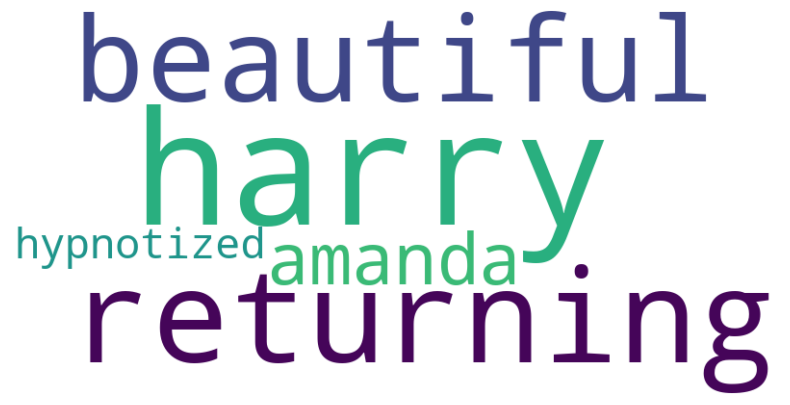

In [31]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

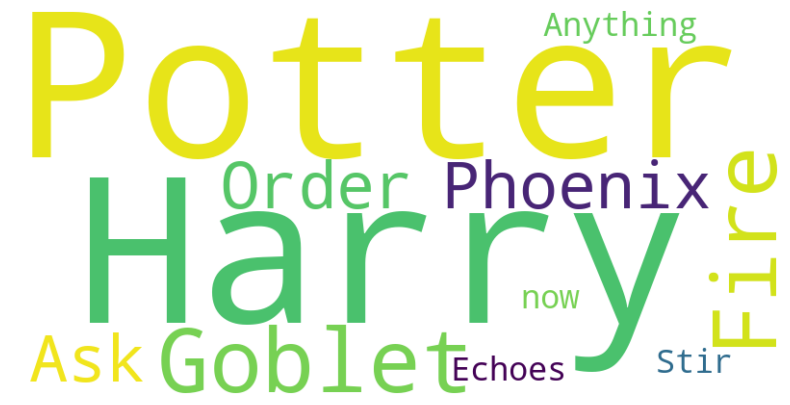

In [32]:
# Get the similar movies
similar_movies = get_similar_movies('Harry Potter and the Half-Blood Prince', similarity_tfidf)

# Create a string of movie titles
movie_titles = ' '.join([movie[0] for movie in similar_movies])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_titles)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()